# Quadrature Demodulation of a Stereo Audio Signal
- https://www.youtube.com/watch?v=h_7d-m1ehoY
- https://www.youtube.com/watch?v=JuuKF1RFvBM  
- http://www.analogzoo.com/2015/08/quadrature-mixers/  
- https://en.wikipedia.org/wiki/In-phase_and_quadrature_components

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

## LO

In [7]:
freq_lo = int(100e3)
freq_sampling = freq_lo * 8 * 2

duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

In [8]:
LO_I = Channel(np.cos(PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
LO_Q = Channel(np.sin(PI2 * freq_lo * t), ts = t, framerate = freq_sampling) 

# show_pair(LO_I, LO_Q, 100)

In [9]:
# LO_I.make_spectrum().plot(freq_lims = (1, freq_sampling))

## RF

In [10]:
freq_if = int(1e3)

freq_left  = +freq_lo + freq_if
freq_right = +freq_lo - freq_if

# attenuation_left  = 0.8
attenuation_left  = 1.0
attenuation_right = 1.0

phase_shift_left  = 0
phase_shift_right = 0
# phase_shift_right = PI2/8

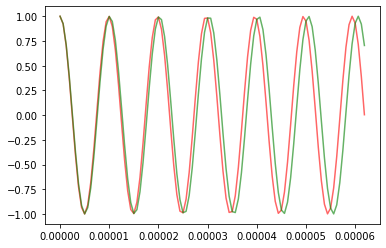

In [11]:
RF_left =  Channel(attenuation_left  * np.exp(1j * (PI2 * freq_left  * t + phase_shift_left )), ts = t, framerate = freq_sampling)
RF_right = Channel(attenuation_right * np.exp(1j * (PI2 * freq_right * t + phase_shift_right)), ts = t, framerate = freq_sampling)

show_pair(RF_left, RF_right, 100)

In [12]:
# RF_left.ys  = RF_left.ys.real
# RF_right.ys = RF_right.ys.real

### IF

#### IF_left

In [13]:
IF_left_I = LO_I * RF_left
IF_left_Q = LO_Q * RF_left
# show_pair(IF_left_I, IF_left_Q, 3000)

# plt.figure();
# IF_left_Q.make_spectrum().plot(freq_lims = (1, freq_sampling));

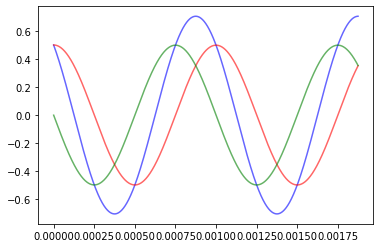

In [14]:
IF_left_I = IF_left_I.filter(low_pass_cutoff = freq_if * 2)
IF_left_Q = IF_left_Q.filter(low_pass_cutoff = freq_if * 2)
IF_left = IF_left_I + IF_left_Q

IF_left.show( color = 'blue', show_frames = slice(0, 3000))
show_pair(IF_left_I, IF_left_Q, 3000)

# plt.figure()
# IF_left_Q.make_spectrum().plot(freq_lims = (1, freq_sampling));

In [15]:
# IF_left.make_spectrum().plot(freq_lims = (1, freq_sampling))

#### IF_right

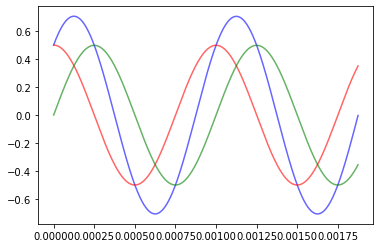

In [16]:
IF_right_I = RF_right * LO_I
IF_right_Q = RF_right * LO_Q 

IF_right_I = IF_right_I.filter(low_pass_cutoff = freq_if * 2)
IF_right_Q = IF_right_Q.filter(low_pass_cutoff = freq_if * 2)
IF_right = IF_right_I + IF_right_Q
# IF_right = Channel(IF_right_I.ys + IF_right_Q.ys, ts = t, framerate = freq_sampling) 

IF_right.show(  color = 'blue', show_frames = slice(0, 3000))
show_pair(IF_right_I, IF_right_Q, 3000)

In [17]:
# IF_right_Q.make_spectrum().plot(freq_lims = (1, freq_sampling))

## 兩個 channels 的比較
- left channel 有 正頻率
- right channel 的頻率是負的
- 頻率的正負:
    - 對 I 成分沒有影響
    - 影響 Q 成分的正負號

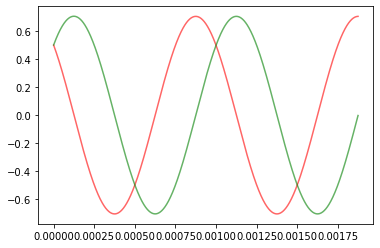

In [18]:
show_pair(IF_left, IF_right, 3000)

### Cosine portions
- cosine 的成分是一致的

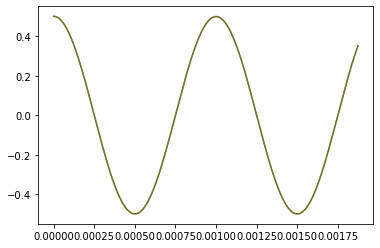

In [19]:
show_pair(IF_left_I, IF_right_I, 3000)

### Sine portions
- sine 的成分有差別，可以用來區分頻率的 正負號 與 方向性

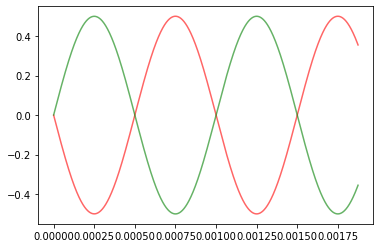

In [20]:
show_pair(IF_left_Q, IF_right_Q, 3000)

## Summary
- 從正面來的聲波 和從後面來的聲波 可以用 IQ demodulation 的方式來區分出來
- 這可以用 兩組纖毛來感測，兩組纖毛的位置剛好隔 $\lambda / 4$